# **Car Price Prediction using Machine Learning. Task 3**
# **Data Science**




# **Name: Sanket Sanjay Bhosale**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
plt.style.use('fivethirtyeight')
%matplotlib inline

In [ ]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 500)

In [ ]:
df = pd.read_csv('/content/CarPrice_Assignment.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
df.shape

(205, 26)

In [ ]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
df.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

Heatmap data for checking the correlation between the numerical features and target column.

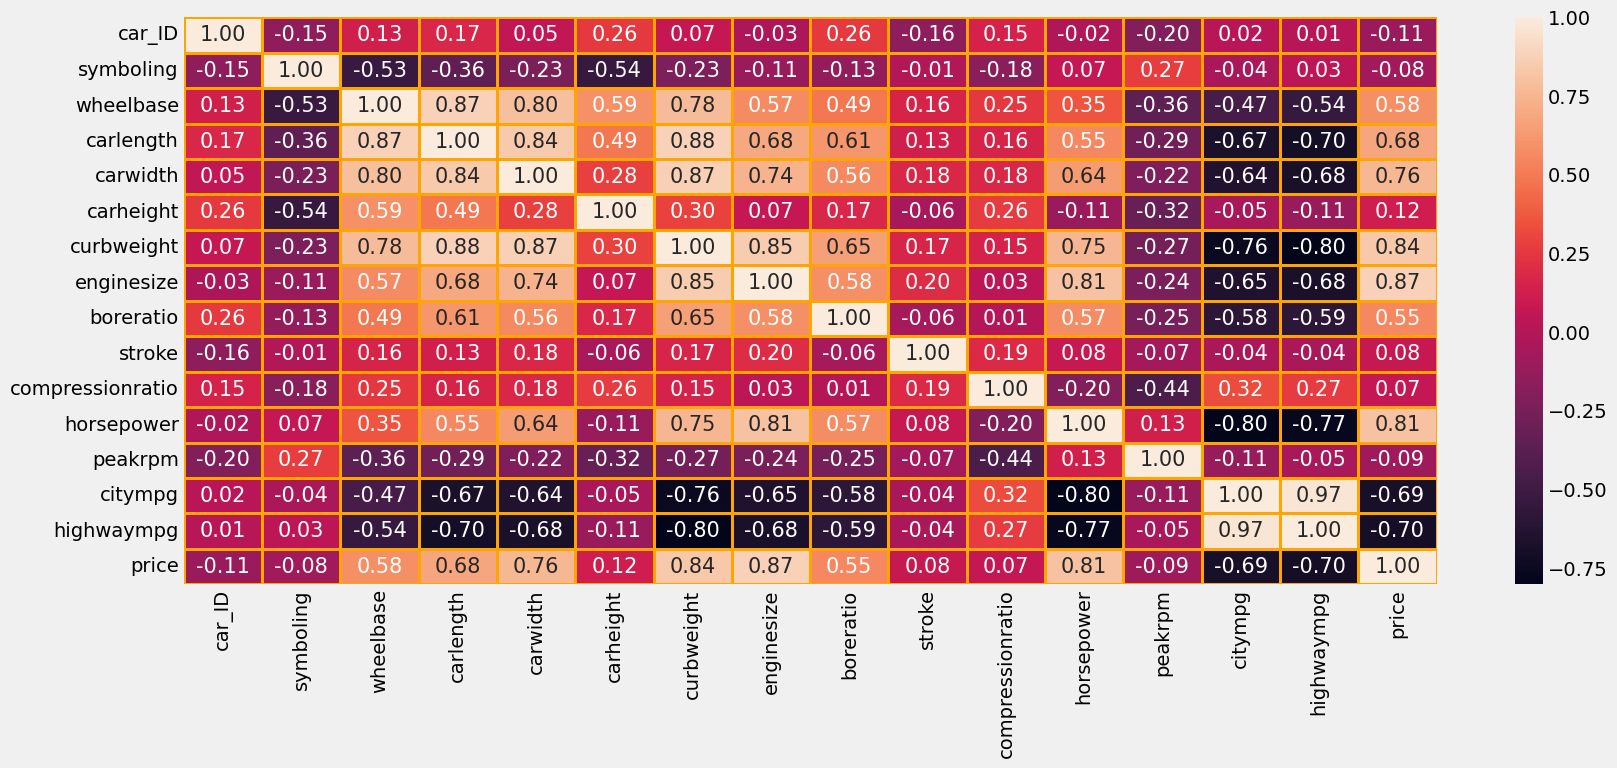

In [ ]:
plt.figure(figsize=(18,7))
sns.heatmap(df.corr(),annot=True, fmt='0.2f', annot_kws = {'size' : 15}, linewidth = 2, linecolor = 'orange')
plt.show()

**Univariate Analysis**

In [ ]:
num_cols = df.select_dtypes(exclude = 'object')
cat_cols = df.select_dtypes(include = 'object')

In [ ]:
num_cols.columns

Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [ ]:
cat_cols.columns

Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem'],
      dtype='object')

<ipython-input-16-25ac1767fe34>:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x = cols[i], data = df, ax = ax, palette='rocket', kde = True, bins = 50)
<ipython-input-16-25ac1767fe34>:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x = cols[i], data = df, ax = ax, palette='rocket', kde = True, bins = 50)
<ipython-input-16-25ac1767fe34>:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x = cols[i], data = df, ax = ax, palette='rocket', kde = True, bins = 50)
<ipython-input-16-25ac1767fe34>:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x = cols[i], data = df, ax = ax, palette='rocket', kde = True, bins = 50)
<ipython-input-16-25ac1767fe34>:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x = cols[i], data = df, ax = ax, palette='rocket', kde = True, bins =

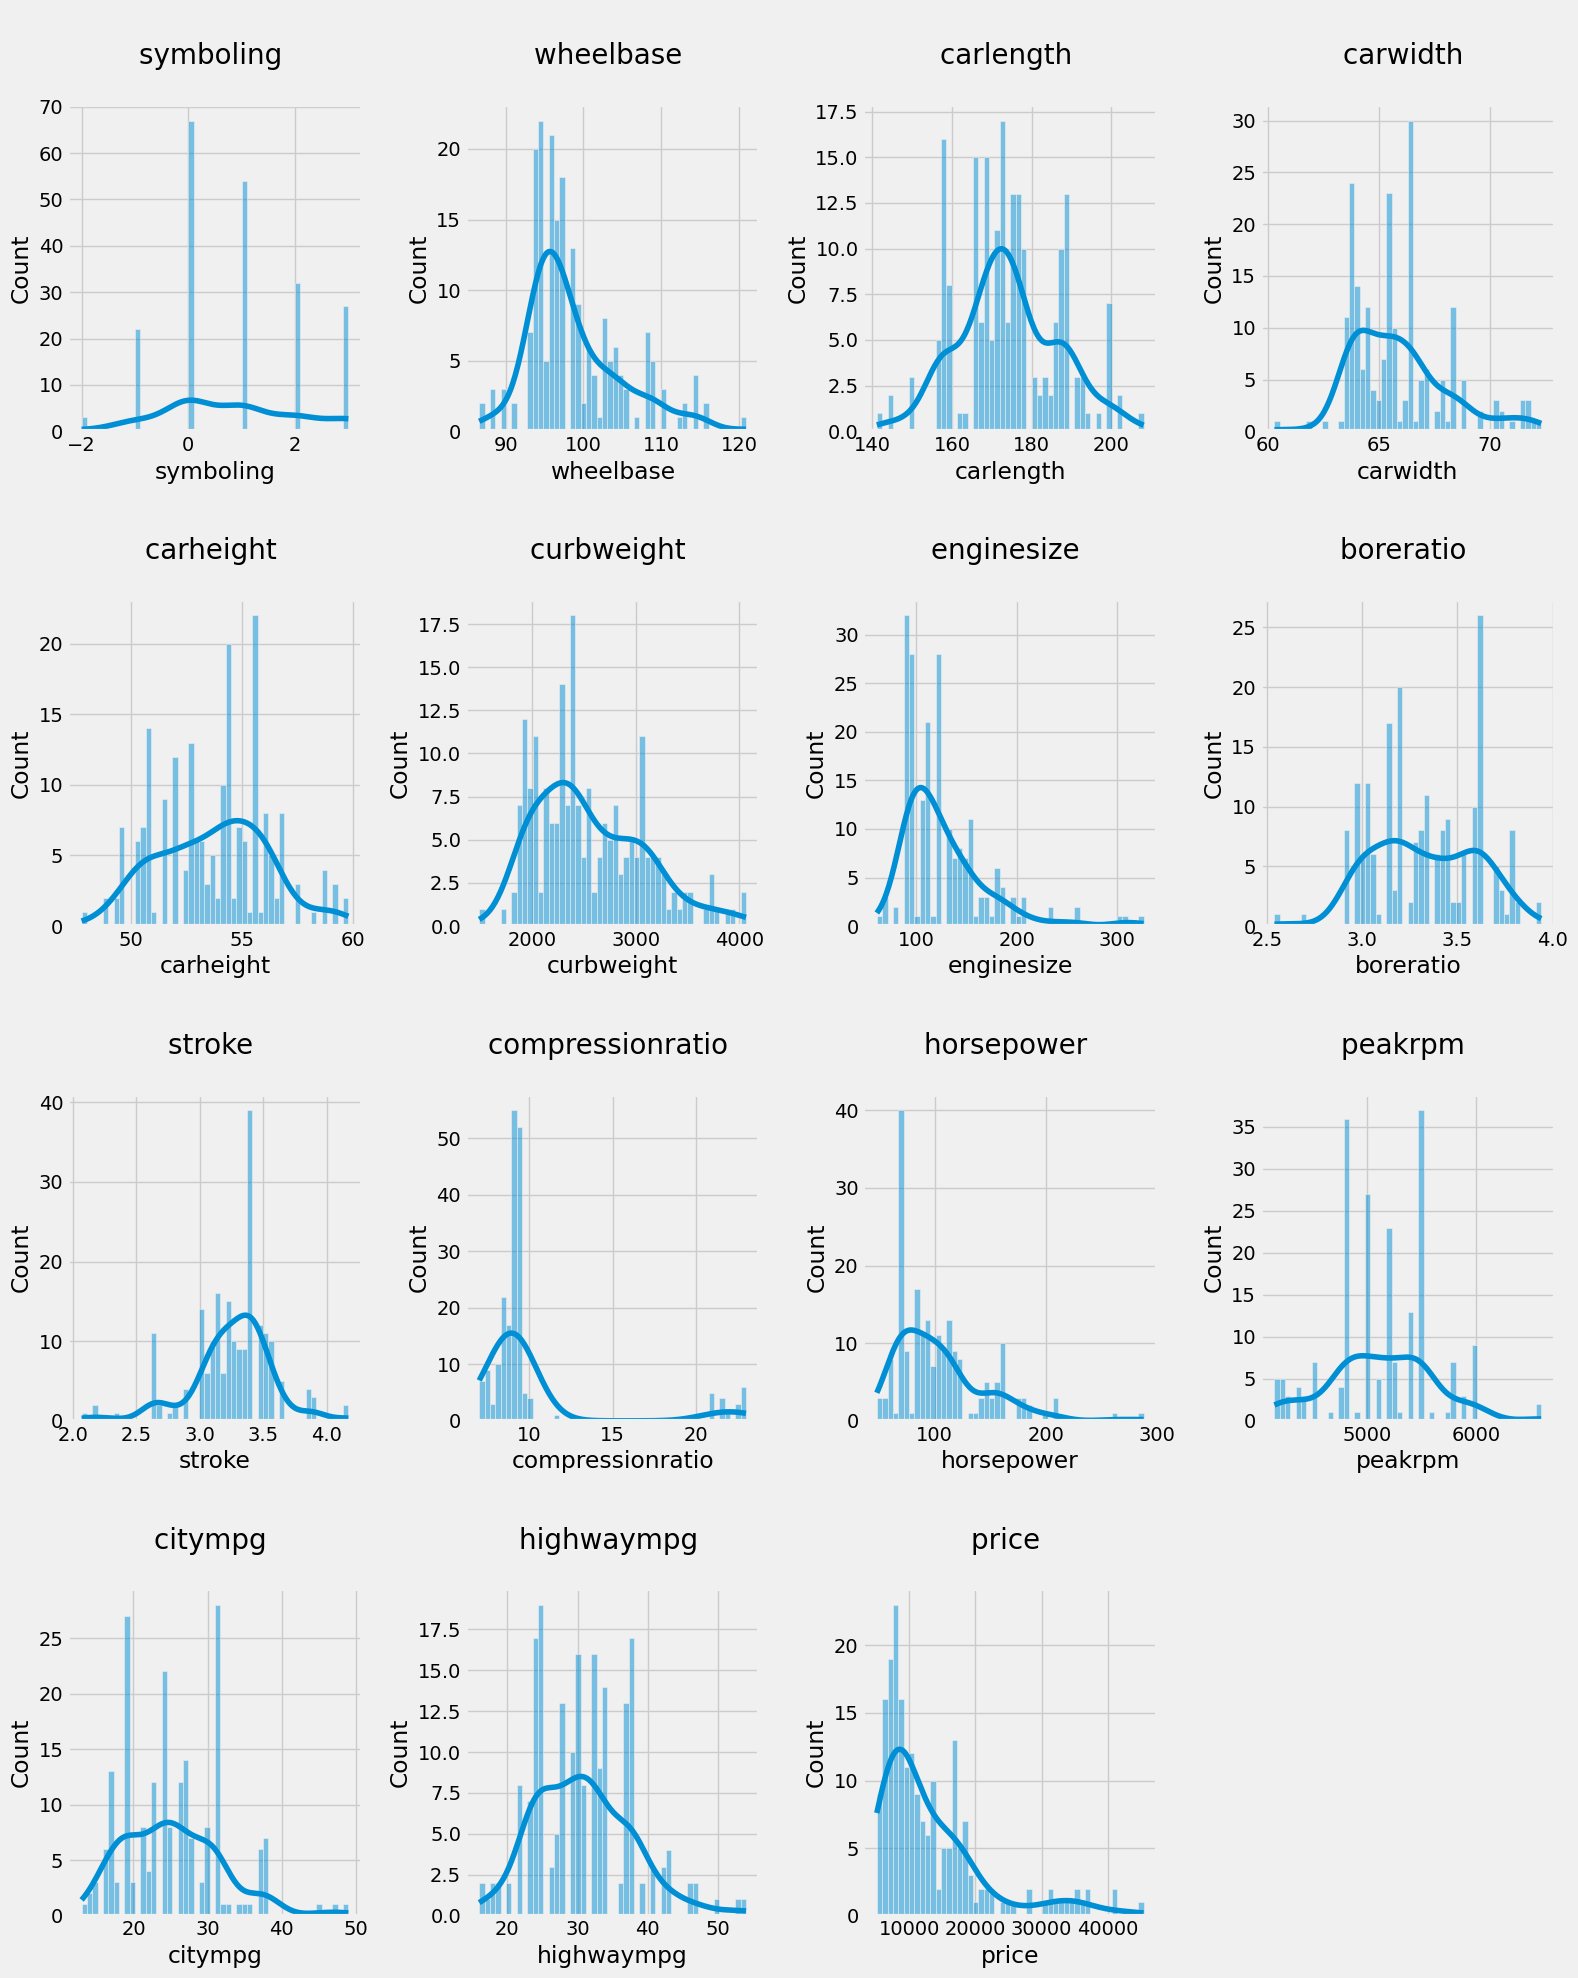

In [ ]:
cols = num_cols.columns
plt.figure(figsize = (16, 20))
plotnumber = 1

for i in range(1, len(cols)):
    if plotnumber <= 16:
        ax = plt.subplot(4, 4, plotnumber)
        sns.histplot(x = cols[i], data = df, ax = ax, palette='rocket', kde = True, bins = 50)
        plt.title(f"\n{cols[i]} \n", fontsize = 20)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

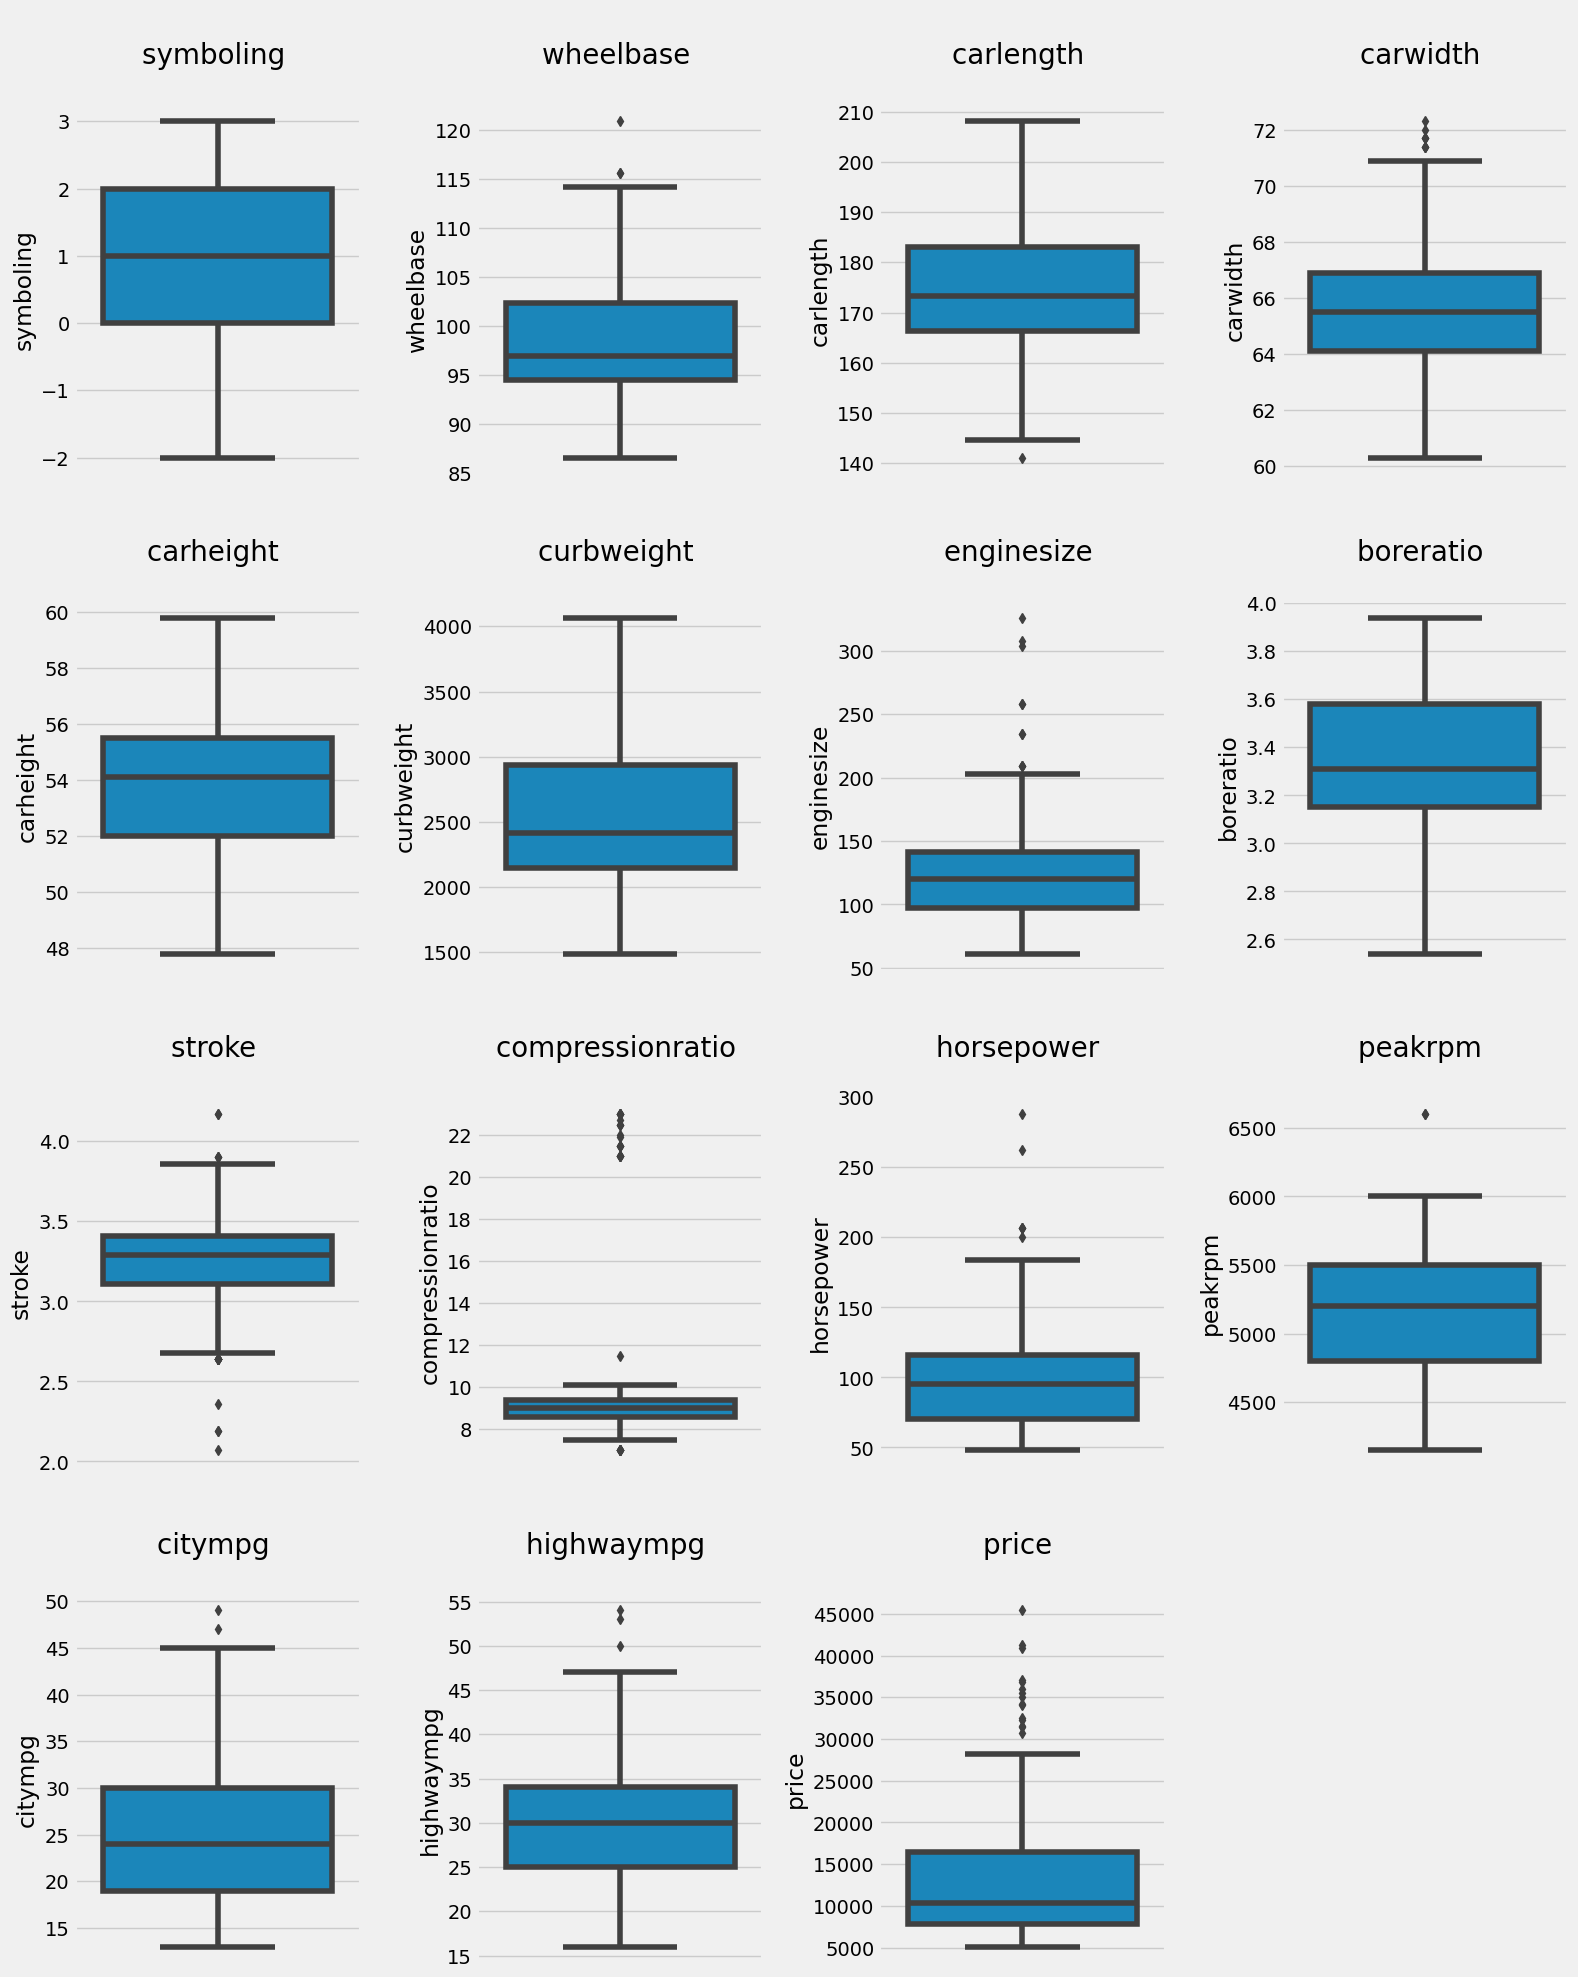

In [ ]:
cols = num_cols.columns

plt.figure(figsize = (16, 20))
plotnumber = 1

for i in range(1, len(cols)):
    if plotnumber <= 16:
        ax = plt.subplot(4, 4, plotnumber)
        sns.boxplot(y = cols[i], data = df, ax = ax)
        plt.title(f"\n{cols[i]} \n", fontsize = 20)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

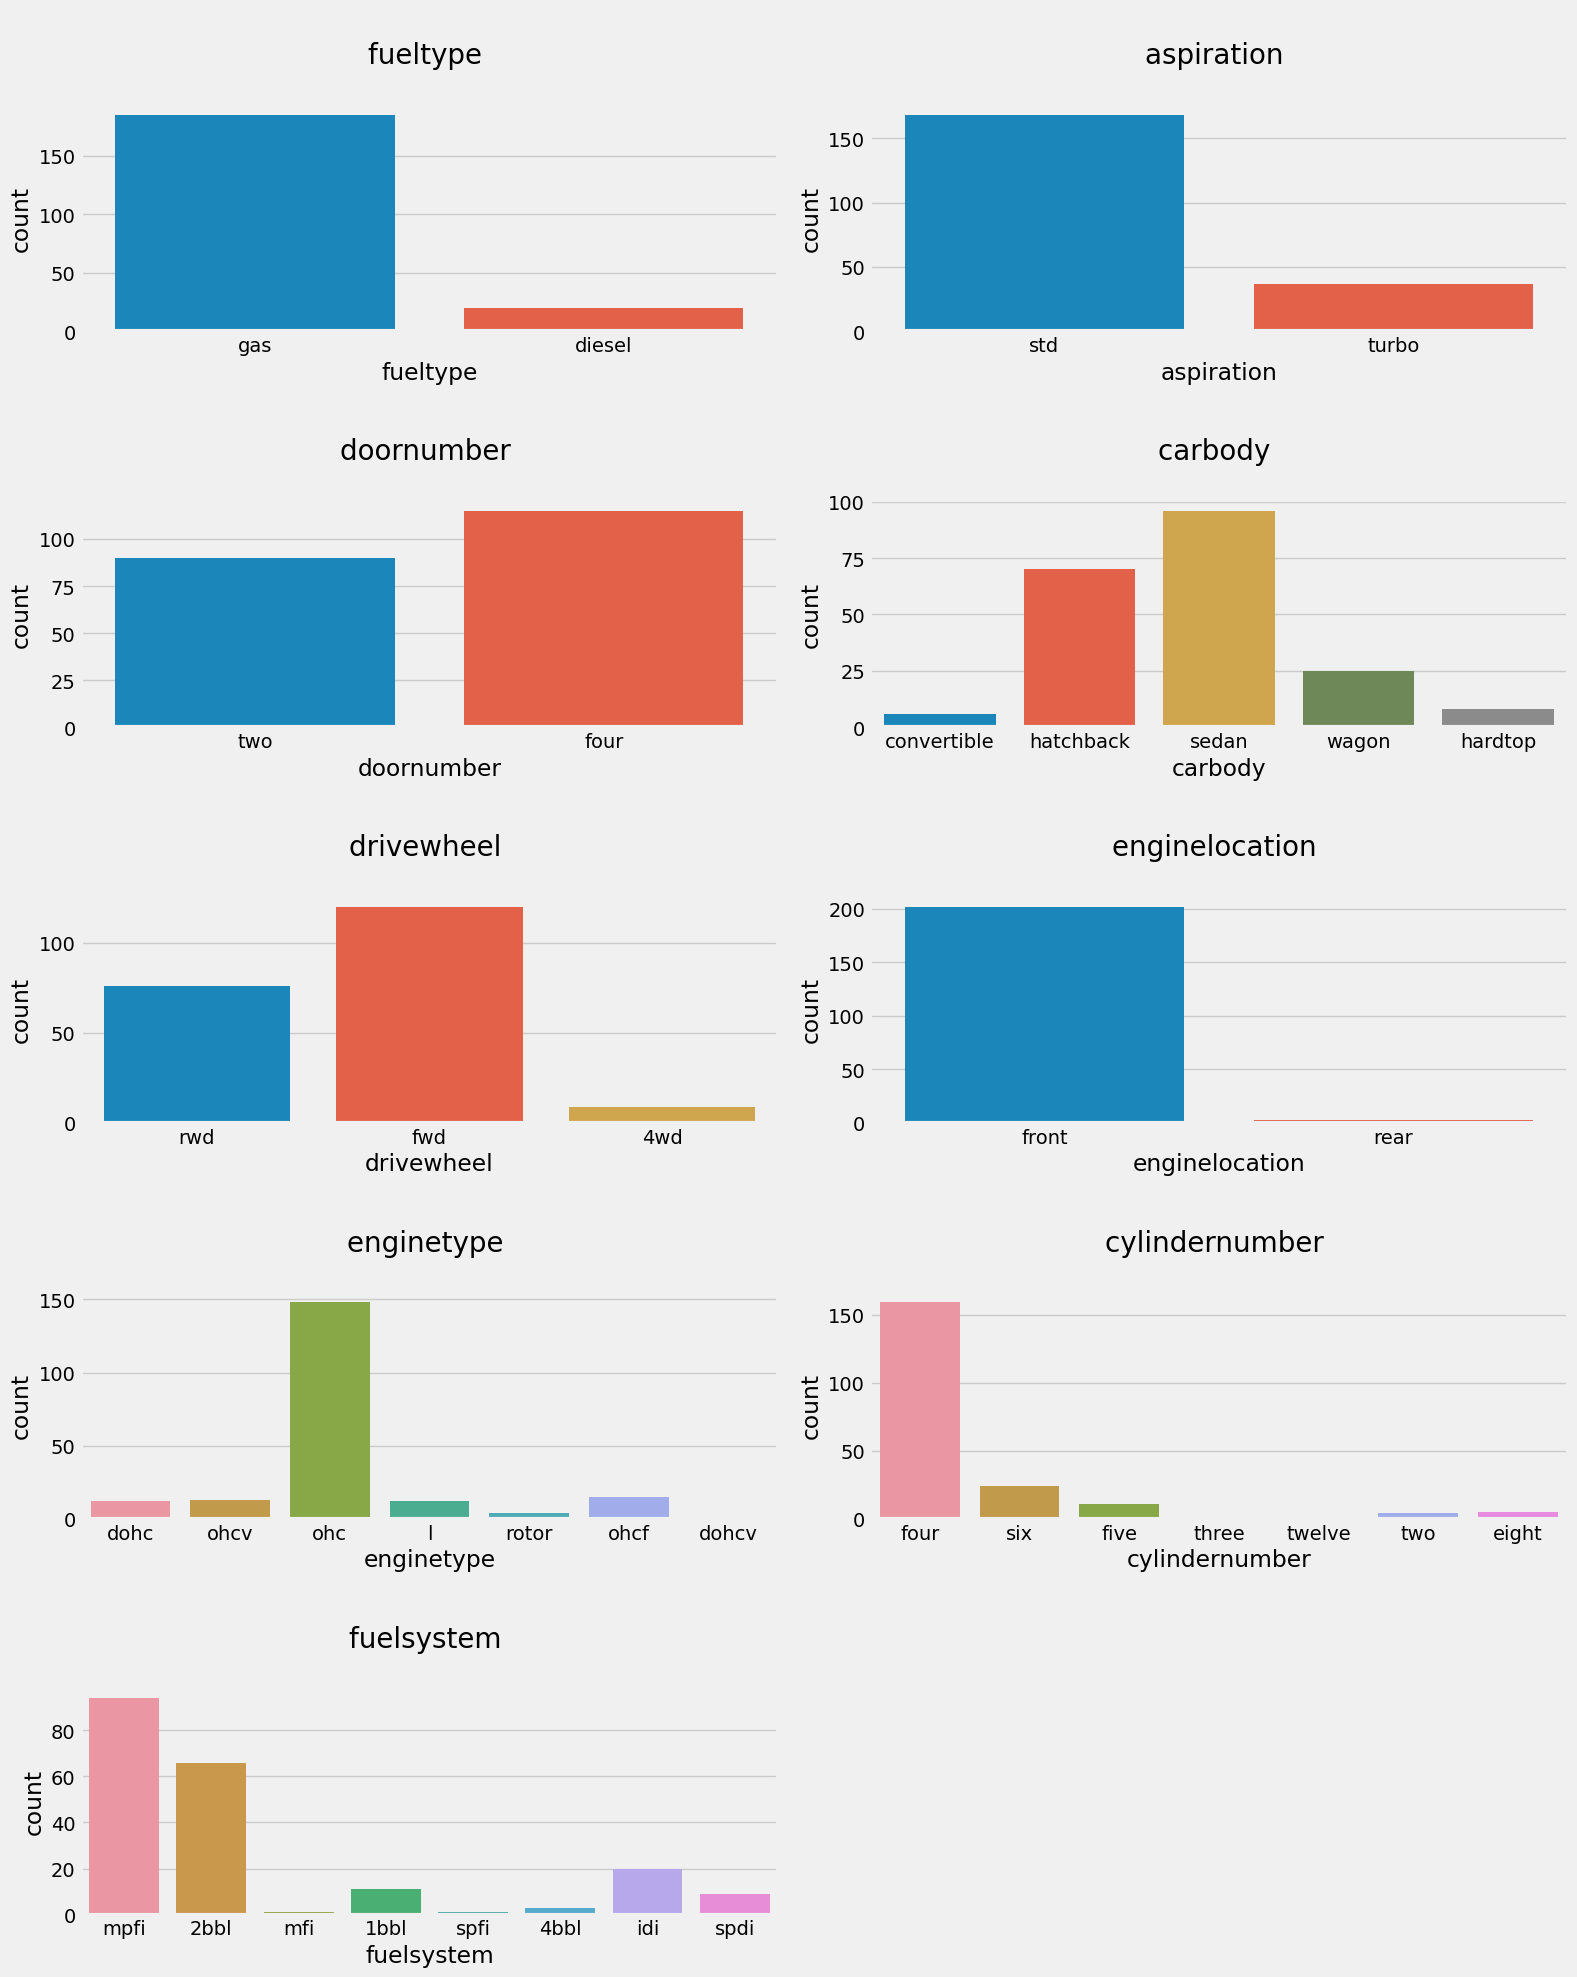

In [ ]:
cols = cat_cols.columns

plt.figure(figsize = (16, 20))
plotnumber = 1

for i in range(1, len(cols)):
    if plotnumber <= 10:
        ax = plt.subplot(5, 2, plotnumber)
        sns.countplot(x = cols[i], data = df, ax = ax)
        plt.title(f"\n{cols[i]} \n", fontsize = 20)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

Piechart fot fuel columns

In [ ]:
fueltype = df['fueltype'].value_counts().reset_index()
fueltype.columns = ['fueltype','value_counts']
fig = px.pie(fueltype,names='fueltype',values = 'value_counts',color_discrete_sequence=px.colors.sequential.Darkmint_r,width=650,height=400,hole=0.5)
fig.update_traces(textinfo = 'percent+label')

pie chart of aspiration column

In [ ]:
aspiration = df['aspiration'].value_counts().reset_index()
aspiration.columns = ['aspiration', 'value_counts']
fig = px.pie(aspiration, names = 'aspiration', values = 'value_counts', color_discrete_sequence = 
            px.colors.sequential.Darkmint_r, width = 650, height = 400, hole = 0.5)
fig.update_traces(textinfo = 'percent+label')

Piechart of enginetype column

In [ ]:
enginetype = df['enginetype'].value_counts().reset_index()
enginetype.columns = ['enginetype', 'value_counts']
fig = px.pie(enginetype, names = 'enginetype', values = 'value_counts', color_discrete_sequence = 
            px.colors.sequential.Darkmint_r, width = 650, height = 400, hole = 0.5)
fig.update_traces(textinfo = 'percent+label')

pie chart of cylindernumber column

In [ ]:
cylindernumber = df['cylindernumber'].value_counts().reset_index()
cylindernumber.columns = ['cylindernumber', 'value_counts']
fig = px.pie(cylindernumber, names = 'cylindernumber', values = 'value_counts', color_discrete_sequence = 
            px.colors.sequential.Darkmint_r, width = 650, height = 400, hole = 0.5)
fig.update_traces(textinfo = 'percent+label')

**Bivariate and Multivariate Analysis**

<ipython-input-26-899cb6faadd3>:11: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

<ipython-input-26-899cb6faadd3>:11: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

<ipython-input-26-899cb6faadd3>:11: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

<ipython-input-26-899cb6faadd3>:11: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

<ipython-input-26-899cb6faadd3>:11: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

<ipython-input-26-899cb6faadd3>:11: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

<ipython-input-26-899cb6faadd3>:11: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

<ipython-input-26-899cb6faadd3>:11: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

<ipython-input-26-899cb6faadd3>:11: UserWarning:

Ignoring `palette` because no 

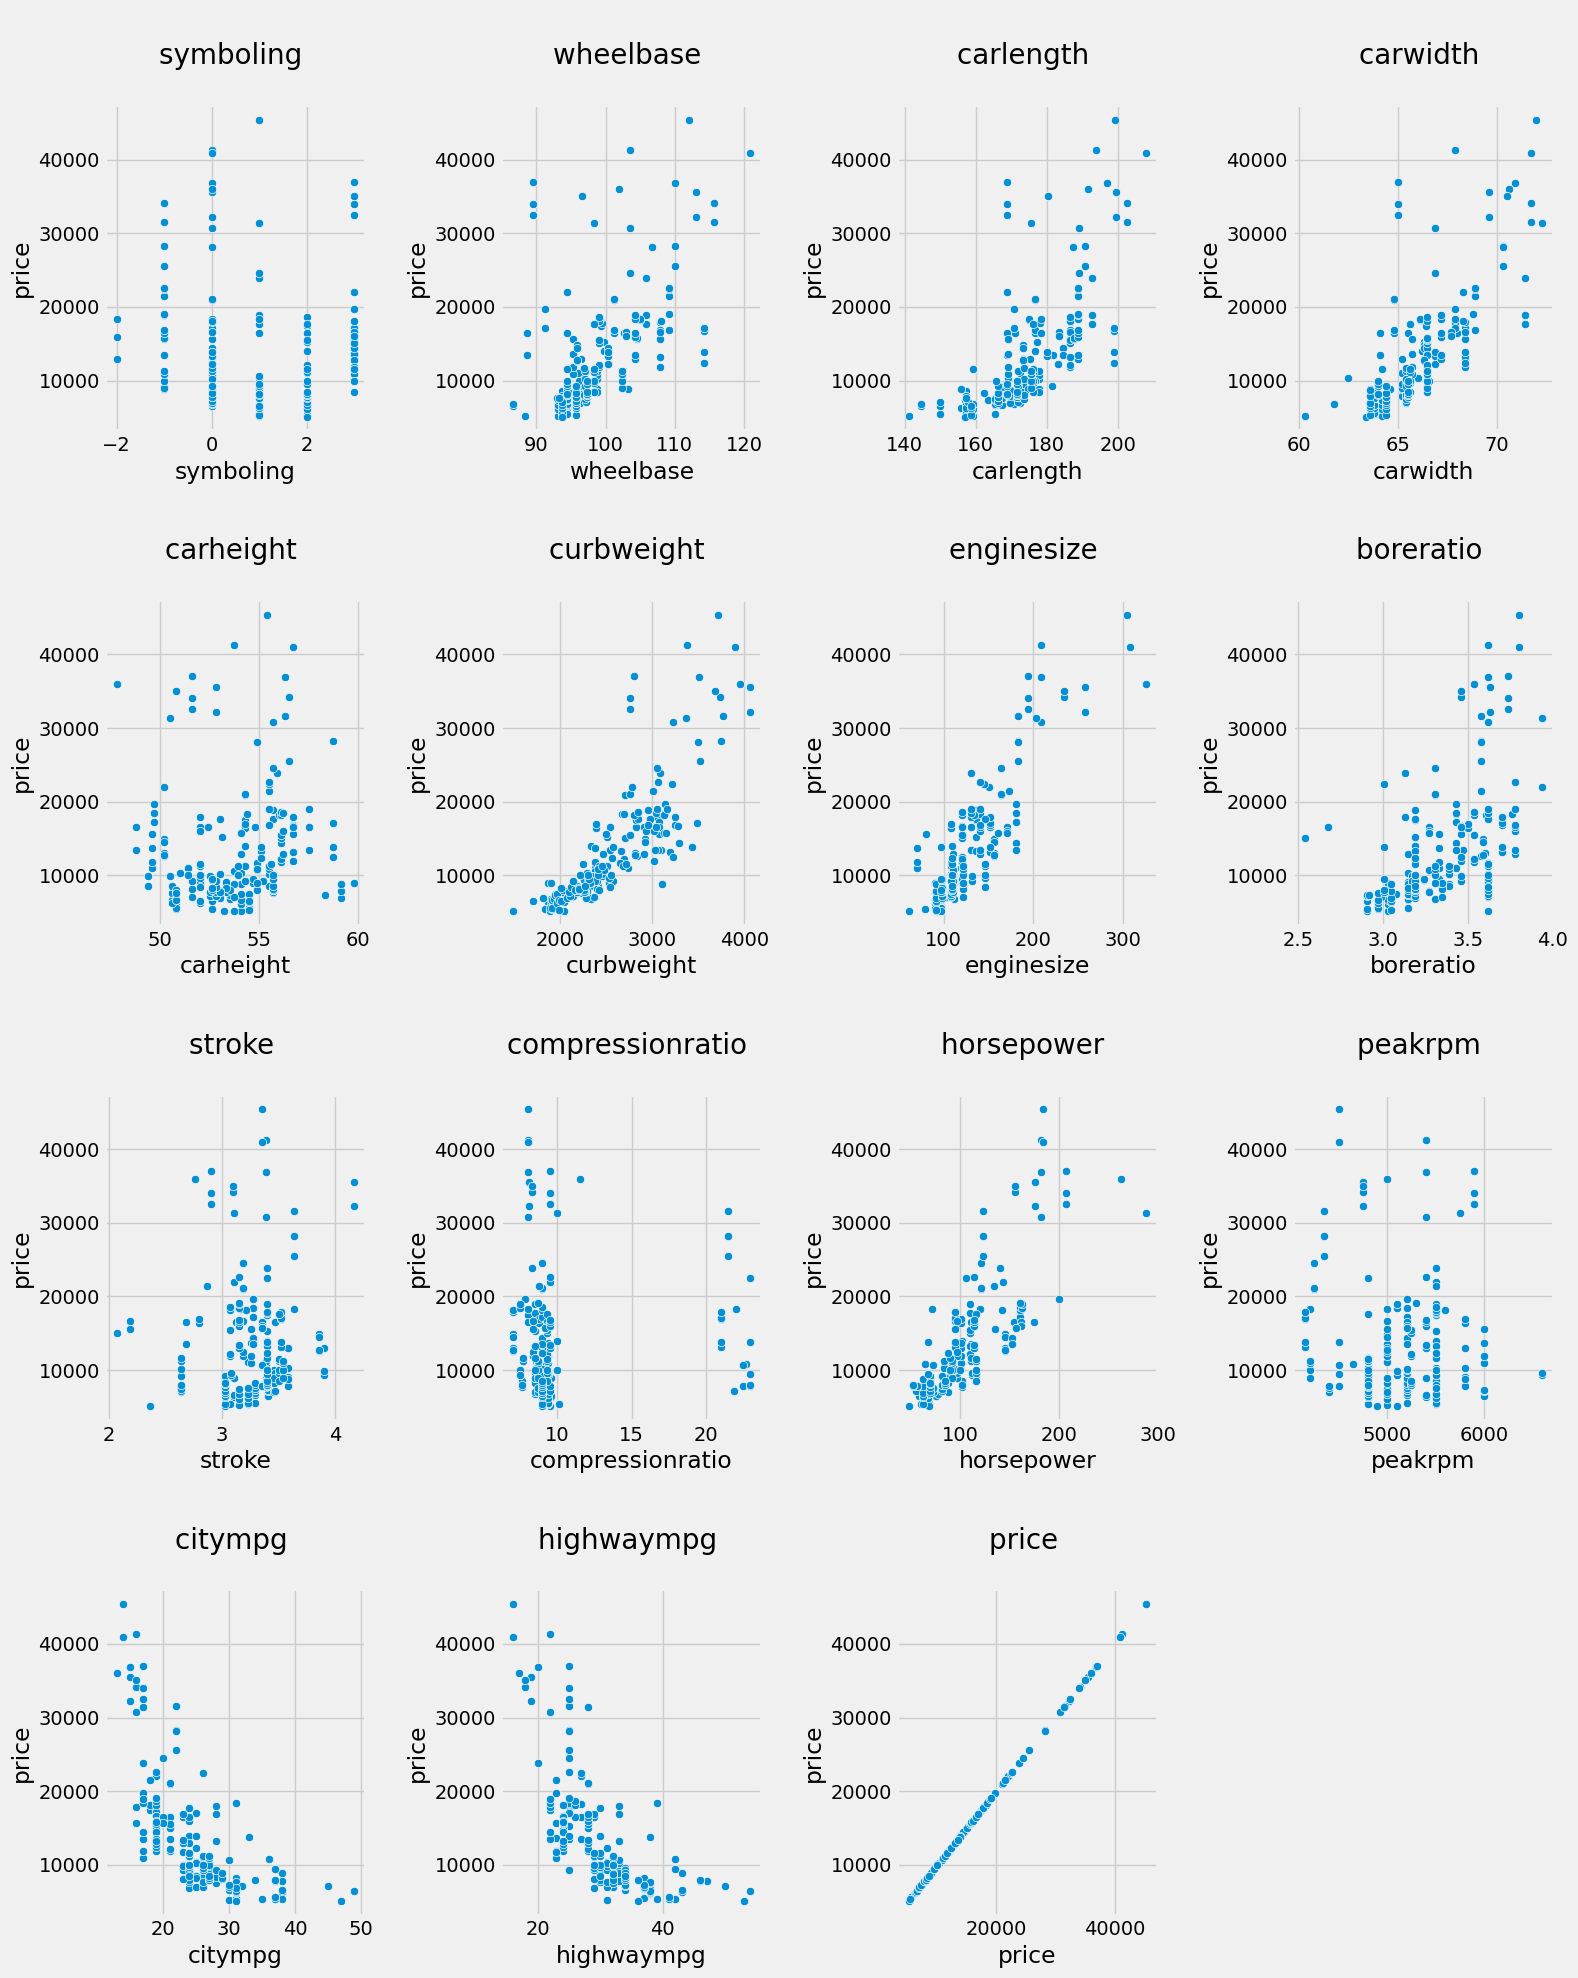

In [ ]:
cols = num_cols.columns

plt.figure(figsize = (16, 20))
plotnumber = 1

# plotting the countplot of each categorical column.

for i in range(1, len(cols)):
    if plotnumber <= 16:
        ax = plt.subplot(4, 4, plotnumber)
        sns.scatterplot(x = cols[i], y = df['price'], data = df, ax = ax, palette='rocket')
        plt.title(f"\n{cols[i]} \n", fontsize = 20)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

In [ ]:
df['CarName'].value_counts()

toyota corona                      6
toyota corolla                     6
peugeot 504                        6
subaru dl                          4
mitsubishi mirage g4               3
mazda 626                          3
toyota mark ii                     3
mitsubishi outlander               3
mitsubishi g4                      3
honda civic                        3
volvo 264gl                        2
bmw 320i                           2
isuzu D-Max                        2
audi 100ls                         2
volvo 244dl                        2
porsche cayenne                    2
toyota corolla liftback            2
honda accord                       2
bmw x3                             2
volvo 144ea                        2
volvo 145e (sw)                    2
honda civic cvcc                   2
saab 99le                          2
toyota starlet                     2
saab 99gle                         2
toyota corolla 1200                2
mazda rx-4                         2
m

In [ ]:
df['CarName'] = df['CarName'].str.split(' ', expand = True)[0]
df['CarName'].value_counts()

toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
volkswagen      9
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
isuzu           4
porsche         4
alfa-romero     3
chevrolet       3
jaguar          3
vw              2
maxda           2
renault         2
toyouta         1
vokswagen       1
Nissan          1
mercury         1
porcshce        1
Name: CarName, dtype: int64

**Handling Duplicate Values**

In [ ]:
df['CarName'] = df['CarName'].replace({'toyouta': 'toyota', 'Nissan': 'nissan', 'maxda': 'mazda', 'vokswagen': 'volkswagen',
                                      'vw': 'volkswagen', 'porcshce': 'porsche'})

df['CarName'].value_counts()

toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
volkswagen     12
subaru         12
peugeot        11
volvo          11
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
jaguar          3
chevrolet       3
alfa-romero     3
renault         2
mercury         1
Name: CarName, dtype: int64

In [ ]:
df1 = pd.DataFrame(df['CarName'].value_counts().reset_index())
df1.columns = ['Car Name', 'No of Cars']

px.bar(data_frame = df1, x = 'No of Cars', y = 'Car Name', color = 'No of Cars', template = 'ggplot2')

Toyota cars are most used.

Mercury is the less used car.:





In [ ]:
px.scatter(data_frame = df, x = 'carlength', y = 'price', color = 'doornumber')

**Cars having four doors are longer than cars having two doors but cars of two doors are costly than cars of four doors.**

In [ ]:
px.scatter(data_frame = df, x = 'enginesize', y = 'price', color = 'carbody')

In [ ]:
px.scatter(data_frame = df, x = 'horsepower', y = 'price', color = 'carbody')

Ohcv engine type is larger in size and have high horsepower than ohc but mpg of ohc is lower than ohcv and this might be the reason why ohc is used in most of the cars.

In [ ]:
px.scatter(data_frame = df, x = 'citympg', y = 'price', color = 'enginetype')

In [ ]:
px.scatter(data_frame = df, x = 'highwaympg', y = 'price', color = 'fuelsystem')

mpfi and 2bbl were mostly used fuel types and we can see that these fuel types have high mpg.

In [ ]:
px.histogram(data_frame = df, x = 'wheelbase', nbins = 50, color = 'aspiration', template = 'ggplot2',
             marginal = 'box', barmode = 'group')

Cars with std aspiration have longer range of wheelbase and their prices are also higher then turbo aspiration.

In [ ]:
px.histogram(data_frame = df, x = 'wheelbase', color = 'carbody', template = 'ggplot2',
             marginal = 'box', barmode = 'group', height = 600)

Convertible cars have smaller wheelbase but their prices are higher.

Sedan and wagon cars have longer wheelbase.

In [ ]:
px.histogram(data_frame = df, x = 'curbweight', nbins = 100, color = 'enginelocation', template = 'ggplot2',
             marginal = 'box', barmode = 'group')

In [ ]:
px.scatter(data_frame = df, x = 'curbweight', y = 'price', color = 'enginelocation', template = 'ggplot2')

Cars having engine at back are very rare and prices are also higher for these cars.

**Data Preprocessing**

In [ ]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
df.drop(columns = ['car_ID'], axis = 1, inplace = True)

In [ ]:
df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
cat_cols = df.select_dtypes(include = 'object')
cat_cols.head()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi


In [ ]:
df['cylindernumber'].value_counts()

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: cylindernumber, dtype: int64

In [ ]:
df.isnull().sum()

symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

**Checking for Outliers**

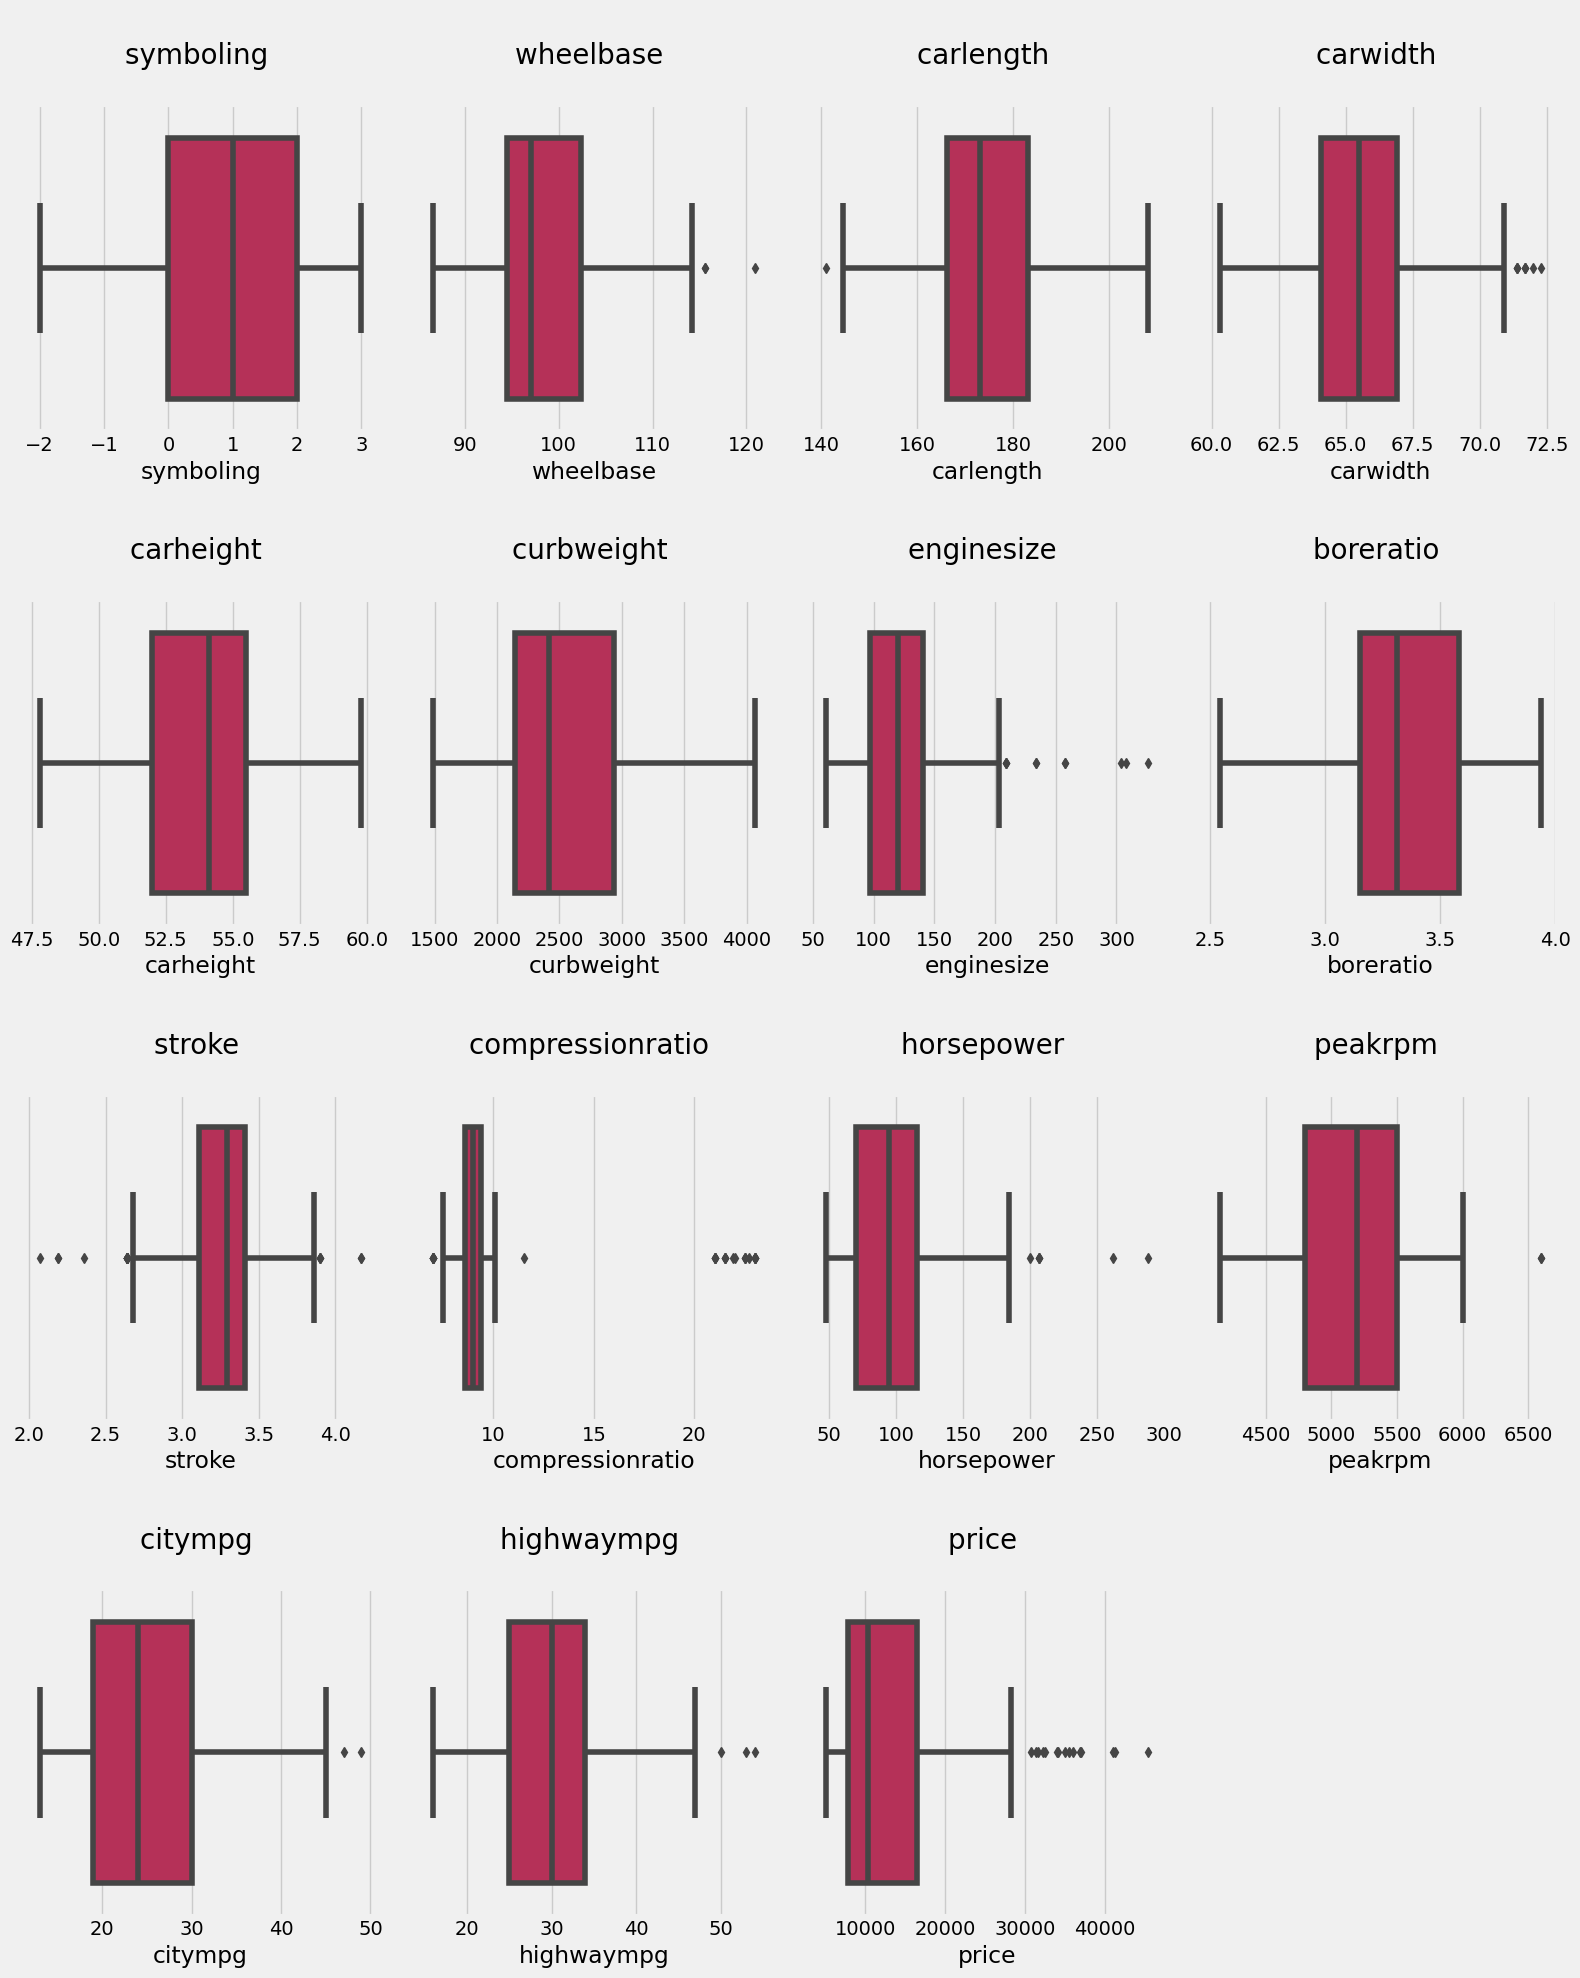

In [ ]:
cols = num_cols.columns
plt.figure(figsize = (16, 20))
plotnumber = 1

for i in range(1, len(cols)):
    if plotnumber <= 16:
        ax = plt.subplot(4, 4, plotnumber)
        sns.boxplot(x = cols[i], data = df, ax = ax, palette='rocket')
        plt.title(f"\n{cols[i]} \n", fontsize = 20)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

Encoding ordinal categorical columns

In [ ]:
df['doornumber'] = df['doornumber'].map({'two': 2, 'four': 4})
df['cylindernumber'] = df['cylindernumber'].map({'two': 2, 'three': 3, 'four': 4, 'five': 5, 'six': 6, 'eight': 8, 'twelve': 12})

In [ ]:
df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,6,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi,gas,std,4,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,4,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi,gas,std,4,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,5,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
df.shape

(205, 25)

In [ ]:
df.drop(columns = ['fueltype', 'carbody', 'aspiration', 'symboling', 'wheelbase', 'cylindernumber', 'doornumber', 'carheight', 'stroke', 'compressionratio', 'peakrpm', 'enginelocation'], axis = 1, inplace = True)

In [ ]:
df.shape

(205, 13)

In [ ]:
df.head()

,CarName,drivewheel,carlength,carwidth,curbweight,enginetype,enginesize,fuelsystem,boreratio,horsepower,citympg,highwaympg,price
0,alfa-romero,rwd,168.8,64.1,2548,dohc,130,mpfi,3.47,111,21,27,13495.0
1,alfa-romero,rwd,168.8,64.1,2548,dohc,130,mpfi,3.47,111,21,27,16500.0
2,alfa-romero,rwd,171.2,65.5,2823,ohcv,152,mpfi,2.68,154,19,26,16500.0
3,audi,fwd,176.6,66.2,2337,ohc,109,mpfi,3.19,102,24,30,13950.0
4,audi,4wd,176.6,66.4,2824,ohc,136,mpfi,3.19,115,18,22,17450.0


creating features and label variable

In [ ]:
X = df.drop(columns = 'price', axis = 1)
y = df['price']

In [ ]:
X = df.drop(columns = 'price', axis = 1)
y = df['price']

In [ ]:
X = pd.get_dummies(X, drop_first = True)
X.head()


,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,CarName_audi,CarName_bmw,CarName_buick,CarName_chevrolet,CarName_dodge,CarName_honda,CarName_isuzu,CarName_jaguar,CarName_mazda,CarName_mercury,CarName_mitsubishi,CarName_nissan,CarName_peugeot,CarName_plymouth,CarName_porsche,CarName_renault,CarName_saab,CarName_subaru,CarName_toyota,CarName_volkswagen,CarName_volvo,drivewheel_fwd,drivewheel_rwd,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,168.8,64.1,2548,130,3.47,111,21,27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1,168.8,64.1,2548,130,3.47,111,21,27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
2,171.2,65.5,2823,152,2.68,154,19,26,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0
3,176.6,66.2,2337,109,3.19,102,24,30,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
4,176.6,66.4,2824,136,3.19,115,18,22,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

In [ ]:
# scaling data

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

**Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
lr.score(X_train, y_train)

0.9595914512142412

In [ ]:
lr.score(X_test, y_test)

0.8514157890643892

**Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
dtr.score(X_train, y_train)

0.9984645419610665

In [ ]:
dtr.score(X_test, y_test)

0.8678108877089306

**Random Forest Regression**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
rfr.score(X_train, y_train)

0.9900126907004088

In [ ]:
rfr.score(X_test, y_test)

0.9088371101835256

In [ ]:
models = pd.DataFrame({
    'Model' : ['Linear Regression', 'Decision Tree', 'Random Forest'],
    'Score' : [lr.score(X_test, y_test), dtr.score(X_test, y_test), rfr.score(X_test, y_test)
               ]
})

models.sort_values(by = 'Score', ascending = False)

,Model,Score
2,Random Forest,0.908837
1,Decision Tree,0.867811
0,Linear Regression,0.851416


In [ ]:
px.bar(data_frame = models, x = 'Score', y = 'Model', color = 'Score', template = 'plotly_dark', title = 'Models Comparison')

### **Achieved an accuracty of 91%.**